In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df= pd.read_csv('loksabha_results_2024.csv')


In [9]:
seats_won = df['Leading Party'].value_counts()


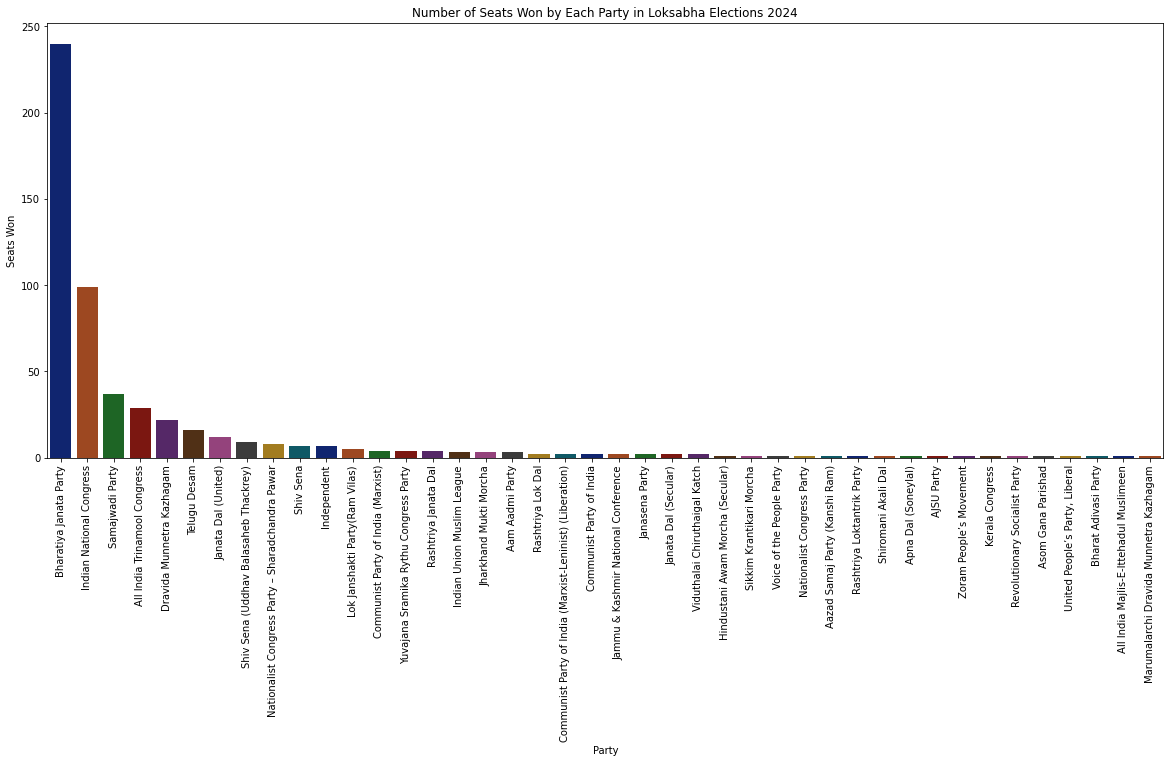

In [11]:
leading_party_highest_votes = party_votes.nlargest(1).index[0]
leading_party_lowest_votes = party_votes.nsmallest(1).index[0]
seats_won = df['Leading Party'].value_counts()
plt.figure(figsize=(20, 8))
sns.barplot(x=seats_won.index, y=seats_won.values, palette='dark')
plt.title('Number of Seats Won by Each Party in Loksabha Elections 2024')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()

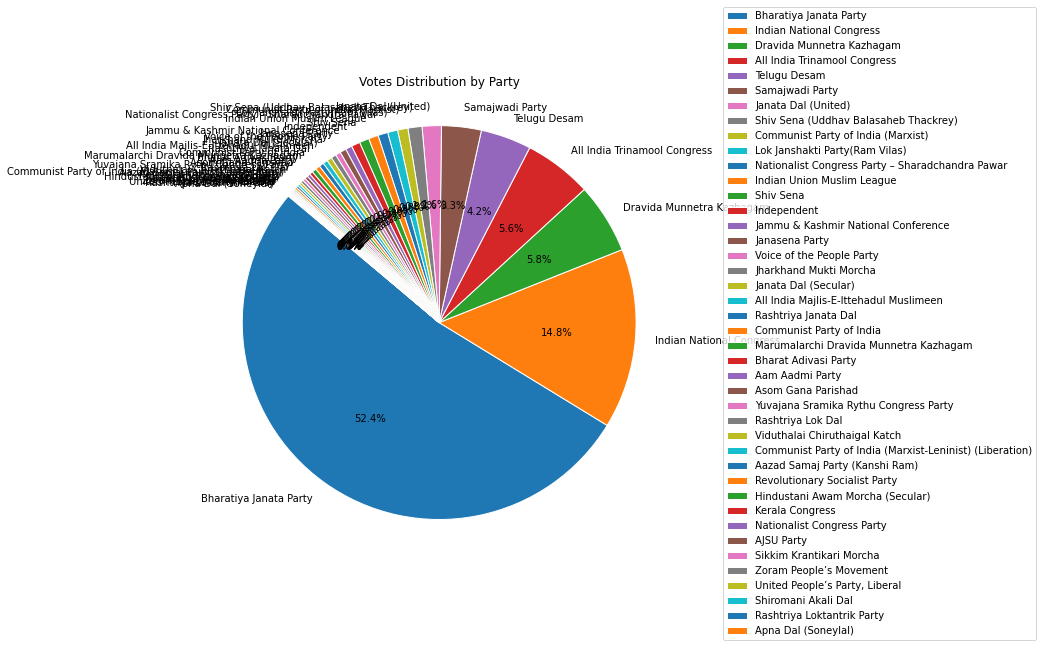

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')

party_votes = df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

party_votes = party_votes.dropna()

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes, labels=party_votes.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))

plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')

plt.legend(wedges, party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')

plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(3, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(4, 0, 'Communist Party of India (Marxist)'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Biju Janata Dal'),
  Text(7, 0, 'Rashtriya Janata Dal'),
  Text(8, 0, 'Bahujan Samaj Party'),
  Text(9, 0, 'Aam Aadmi Party')])

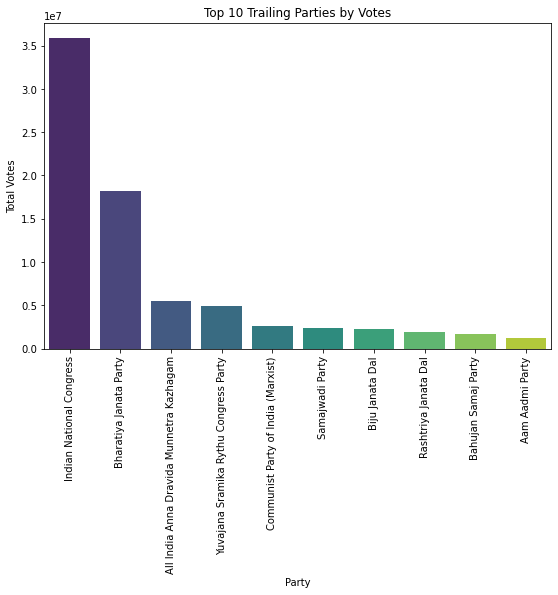

In [46]:
trailing_party_votes = df.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats = df['Trailing Party'].value_counts()

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)



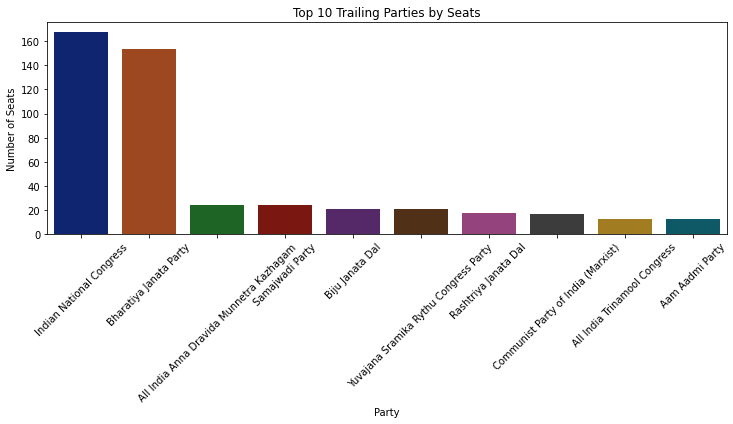

In [47]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette='dark')
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [48]:
df['Leading Party'].unique()


array(['Bharatiya Janata Party', 'Indian National Congress',
       'Jammu & Kashmir National Conference', 'Dravida Munnetra Kazhagam',
       'Nationalist Congress Party – Sharadchandra Pawar',
       'Communist Party of India (Marxist)', 'Telugu Desam',
       'Samajwadi Party', 'Aam Aadmi Party',
       'Yuvajana Sramika Rythu Congress Party',
       'All India Trinamool Congress',
       'Communist Party of India (Marxist-Leninist) (Liberation)',
       'Shiv Sena', 'Rashtriya Janata Dal', 'Bharat Adivasi Party',
       'Independent', 'Rashtriya Lok Dal', 'Janata Dal (United)',
       'Asom Gana Parishad', 'Shiromani Akali Dal',
       'Viduthalai Chiruthaigal Katch', 'Jharkhand Mukti Morcha',
       'Hindustani Awam Morcha (Secular)', 'AJSU Party',
       'Lok Janshakti Party(Ram Vilas)',
       'Shiv Sena (Uddhav Balasaheb Thackrey)',
       'All India Majlis-E-Ittehadul Muslimeen', 'Janasena Party',
       'United People’s Party, Liberal', 'Janata Dal (Secular)',
       'Revolut

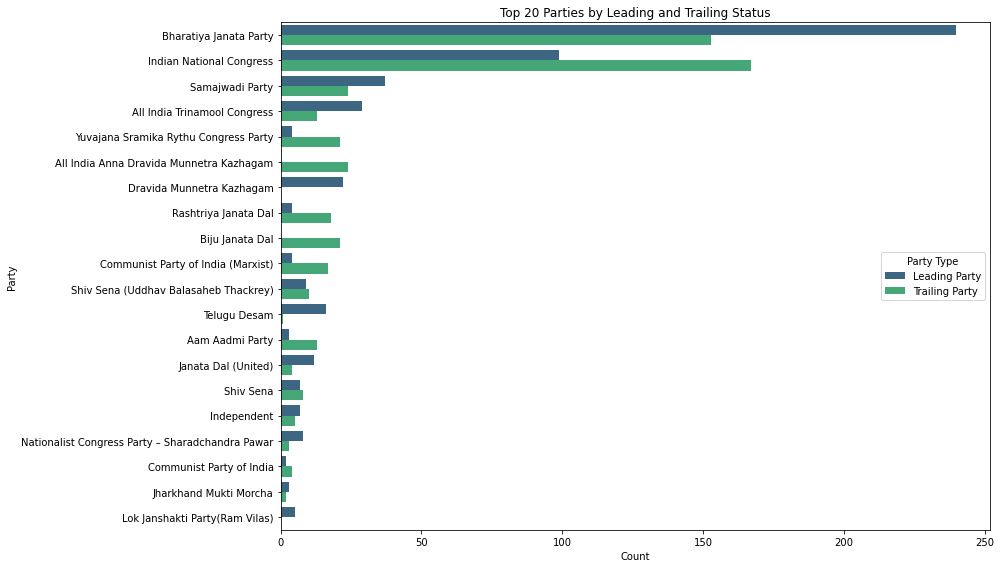

In [16]:
def leading_vs_trailing_parties(df, n=20):
    leading_trailing = df.melt(id_vars=['Constituency'], 
                               value_vars=['Leading Party', 'Trailing Party'], 
                               var_name='Party Type', 
                               value_name='Party')
    
    top_n_parties = leading_trailing['Party'].value_counts().index[:n]
    
    leading_trailing = leading_trailing[leading_trailing['Party'].isin(top_n_parties)]
    
    plt.figure(figsize=(14, 8))
    sns.countplot(y='Party', hue='Party Type', data=leading_trailing, order=top_n_parties, palette='viridis')
    plt.title(f'Top {n} Parties by Leading and Trailing Status')
    plt.xlabel('Count')
    plt.ylabel('Party')
    plt.tight_layout()
    plt.show()

leading_vs_trailing_parties(df, n=20)